In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os 
from dotenv import load_dotenv
from pathlib import Path
load_dotenv()
CSV_OUTPUT_PATH = Path(os.getenv("CSV_OUTPUT_PATH"))
CSV_FILE = os.getenv("CLEANED_ARTICLES_FILENAME")

MODEL_OUTPUT_PATH = Path(os.getenv("MODEL_OUTPUT_PATH"))
NP_OUTPUT_PATH = Path(os.getenv("NP_OUTPUT_PATH"))
MODEL_FILE = os.getenv("MODEL_FILENAME")
EMBEDDED_ARTICLES_FILENAME = os.getenv("EMBEDDED_ARTICLES_FILENAME")


CLEANED_ARTICLES_FILENAME=os.getenv("CLEANED_ARTICLES_FILENAME")
EMBEDDED_ARTICLES_FILENAME=os.getenv("EMBEDDED_ARTICLES_FILENAME")
MODEL_FILENAME=os.getenv("MODEL_FILENAME")
GROUPED_RISK_TAGS_CSV=os.getenv("GROUPED_RISK_TAGS_CSV")
ARTICLES_WITH_RISK_TAGS_CSV=os.getenv("ARTICLES_WITH_RISK_TAGS_CSV")
LM_LEXICON_FILENAME=os.getenv("LM_LEXICON_FILENAME")
STOCK_RISK_EXPOSURE_CSV=os.getenv("STOCK_RISK_EXPOSURE_CSV")

Cluster Distribution:
 -1.0      25041
 0.0     227419
 1.0       1048
 2.0        542
 3.0       1177
 4.0       1035
 5.0        343
 6.0        556
 7.0        198
 8.0        228
 9.0        208
 10.0       142
 11.0       267
 12.0       102
 13.0       180
 14.0       147
 15.0       120
 16.0       161
 17.0       129
 18.0        98
Name: count, dtype: int64


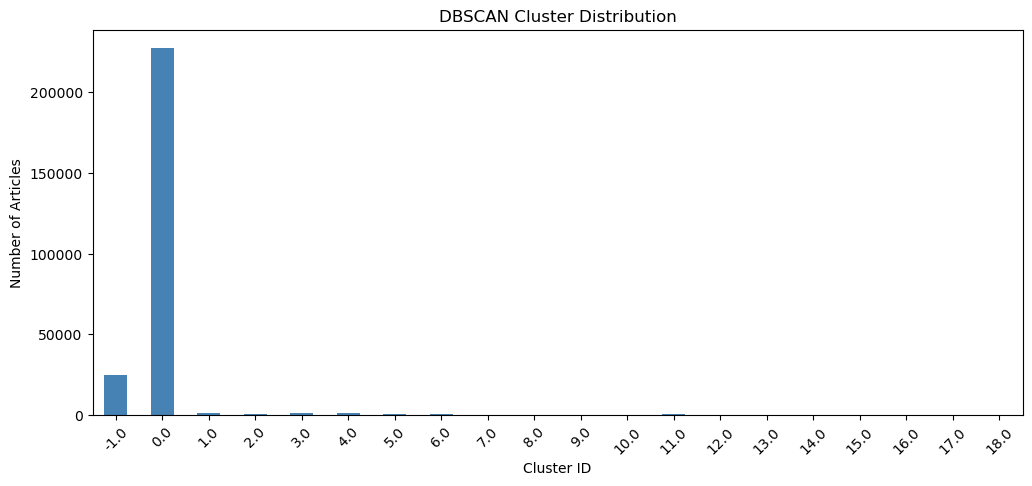

In [ ]:
# Load saved clusters
data_with_clusters = np.load("Word2Vec/retry/data/article_vectors_with_clusters.npy")
article_vectors = data_with_clusters[:, :-1]  # Extract article vectors
cluster_labels = data_with_clusters[:, -1]  # Extract cluster labels

# Count articles in each cluster
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()

# Print cluster sizes
print("Cluster Distribution:\n", cluster_counts)

# Plot cluster sizes
plt.figure(figsize=(12, 5))
cluster_counts.plot(kind="bar", color="steelblue")
plt.xlabel("Cluster ID")
plt.ylabel("Number of Articles")
plt.title("DBSCAN Cluster Distribution")
plt.xticks(rotation=45)
plt.show()


In [ ]:
from collections import Counter
import ast

# Load cleaned dataset 
df_cleaned = pd.read_csv(f"{CSV_OUTPUT_PATH}/{CLEANED_ARTICLES_FILENAME}")
# remove dupes from title 
df_cleaned = df_cleaned.drop_duplicates(subset=['article_title'])

In [26]:
# Convert token strings back to lists (if stored as strings)
df_cleaned["tokens"] = df_cleaned["tokens"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Add DBSCAN cluster labels to dataset
df_cleaned["cluster"] = cluster_labels.astype(int)  # Ensure int type for easier grouping

# Function to get most common words per cluster
def get_top_words(cluster_id, n=15):
    words = [word for tokens in df_cleaned[df_cleaned["cluster"] == cluster_id]["tokens"] for word in tokens]
    word_counts = Counter(words).most_common(n)
    return word_counts

# Analyze a few sample clusters
sample_clusters = [0, 1, 2, 3, 4]  # Adjust based on distribution
for cluster_id in sample_clusters:
    print(f"\n**Top Words in Cluster {cluster_id}:**")
    print(get_top_words(cluster_id))



**Top Words in Cluster 0:**
[('stock', 147644), ('2024', 85515), ('earning', 81033), ('$', 80995), ('%', 71941), ('company', 70252), (' ', 58793), ('inc', 57083), ('market', 52421), ('quarter', 48930), ('report', 45711), ('share', 44905), ('year', 43507), ('buy', 38465), ('announce', 38445)]

**Top Words in Cluster 1:**
[('value', 2096), ('stock', 2096), ('well', 1918), ('vs', 1635), ('option', 1457), ('right', 461), ('investor', 178), ('buy', 178), ('efx', 28), ('blk', 26), ('ohi', 26), ('peg', 26), ('celh', 24), ('ma', 24), ('nee', 24)]

**Top Words in Cluster 2:**
[('article', 542), ('roe', 364), ('metric', 354), ('investor', 347), ('inc', 275), ('%', 275), ('stock', 248), ('good', 209), ('investment', 195), ('knowledge', 195), ('skill', 195), ('set', 195), ('mind', 195), ('like', 192), ('financial', 176)]

**Top Words in Cluster 3:**
[('stock', 2141), ('know', 1243), ('zackscom', 1177), ('user', 1177), ('fact', 865), ('attention', 837), ('inc', 692), ('worth', 657), ('bit', 626), 

In [27]:
df_cleaned[df_cleaned["cluster"] == 0]

,ticker,mapped_trading_date,article_title,description,full_text,clean_text,tokens,cluster
0,DXC,2024-07-11,DXC Technology to Report Fiscal First Quarter ...,"ASHBURN, Va., July 10, 2024--DXC Technology (N...",DXC Technology to Report Fiscal First Quarter ...,dxc technology to report fiscal first quarter ...,"[dxc, technology, report, fiscal, quarter, 202...",0
1,DRI,2024-07-17,Darden to buy Chuyâs for more than $600M,The all-cash transaction will add a Tex-Mex ch...,Darden to buy Chuyâs for more than $600M The...,darden to buy chuyâs for more than $600m the a...,"[darden, buy, chuyâs, $, 600, m, allcash, tran...",0
3,DRI,2024-07-22,Analysts Have Made A Financial Statement On Da...,Last week saw the newest yearly earnings relea...,Analysts Have Made A Financial Statement On Da...,analysts have made a financial statement on da...,"[analyst, financial, statement, darden, restau...",0
4,DVA,2024-07-23,DaVita HealthCare (DVA) Laps the Stock Market:...,The latest trading day saw DaVita HealthCare (...,DaVita HealthCare (DVA) Laps the Stock Market:...,davita healthcare dva laps the stock market he...,"[davita, healthcare, dva, lap, stock, market, ...",0
5,DOV,2024-07-25,"Dover (DOV) Beats Earnings Estimates in Q2, Ra...",Dover (DOV) raises adjusted EPS projection to ...,"Dover (DOV) Beats Earnings Estimates in Q2, Ra...",dover dov beats earnings estimates in q2 raise...,"[dover, dov, beat, earning, estimate, q2, rais...",0
...,...,...,...,...,...,...,...,...
363807,MRK,2024-06-28,CDCâS ACIP Unanimously Recommends Merckâs ...,"RAHWAY, N.J., June 28, 2024--CDCâS ACIP Unan...",CDCâS ACIP Unanimously Recommends Merckâs ...,cdcâs acip unanimously recommends merckâs capv...,"[cdcâs, acip, unanimously, recommend, merckâs,...",0
363808,MRK,2024-07-05,Roche's New Immunotherapy Fails To Show Benefi...,"On Thursday, Roche Holdings AG (OTC:RHHBY) sai...",Roche's New Immunotherapy Fails To Show Benefi...,roches new immunotherapy fails to show benefit...,"[roche, new, immunotherapy, fail, benefit, mer...",0
363815,MORN,2024-07-30,Morningstar Retirement Launches New Morningsta...,"CHICAGO, July 30, 2024--Morningstar Retirement...",Morningstar Retirement Launches New Morningsta...,morningstar retirement launches new morningsta...,"[morningstar, retirement, launch, new, morning...",0
363816,MOD,2024-07-31,Modine Reports First Quarter Fiscal 2025 Results,"Modine (NYSE: MOD), a diversified global leade...",Modine Reports First Quarter Fiscal 2025 Resul...,modine reports first quarter fiscal 2025 resul...,"[modine, report, quarter, fiscal, 2025, result...",0


In [ ]:
# Load Loughran-McDonald Lexicon
lm_dict_path = f'{CSV_OUTPUT_PATH}/{LM_LEXICON_FILENAME}'
lm_df = pd.read_csv(lm_dict_path)

# Define sentiment categories
sentiment_categories = ['Negative', 'Positive', 'Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal']
lm_sentiment_dict = {category: set(lm_df[lm_df[category] > 0]['Word'].str.lower()) for category in sentiment_categories}

In [29]:
lm_sentiment_dict["Uncertainty"]

{'abeyance',
 'abeyances',
 'almost',
 'alteration',
 'alterations',
 'ambiguities',
 'ambiguity',
 'ambiguous',
 'anomalies',
 'anomalous',
 'anomalously',
 'anomaly',
 'anticipate',
 'anticipated',
 'anticipates',
 'anticipating',
 'anticipation',
 'anticipations',
 'apparent',
 'apparently',
 'appear',
 'appeared',
 'appearing',
 'appears',
 'approximate',
 'approximated',
 'approximately',
 'approximates',
 'approximating',
 'approximation',
 'approximations',
 'arbitrarily',
 'arbitrariness',
 'arbitrary',
 'assume',
 'assumed',
 'assumes',
 'assuming',
 'assumption',
 'assumptions',
 'believe',
 'believed',
 'believes',
 'believing',
 'cautious',
 'cautiously',
 'cautiousness',
 'clarification',
 'clarifications',
 'conceivable',
 'conceivably',
 'conditional',
 'conditionally',
 'confuses',
 'confusing',
 'confusingly',
 'confusion',
 'contingencies',
 'contingency',
 'contingent',
 'contingently',
 'contingents',
 'could',
 'crossroad',
 'crossroads',
 'depend',
 'depended',
 '

In [30]:
def assign_risk_theme(cluster_id):
    words = [word for tokens in df_cleaned[df_cleaned["cluster"] == cluster_id]["tokens"] for word in tokens]
    word_counts = Counter(words)
    total_words = sum(word_counts.values())

    category_proportions = {}
    for category, word_set in lm_sentiment_dict.items():
        category_count = sum(count for word, count in word_counts.items() if word in word_set)
        category_proportions[category] = category_count / total_words if total_words > 0 else 0

    # Custom thresholds
    low_freq_categories = ['Litigious', 'Strong_Modal', 'Weak_Modal','Uncertainty']
    threshold = {cat: 0.01 if cat in low_freq_categories else 0.05 for cat in category_proportions}

    # Apply threshold check
    valid_categories = {cat: score for cat, score in category_proportions.items() if score > threshold[cat]}

    if valid_categories:
        dominant_category = max(valid_categories, key=valid_categories.get)
        return dominant_category
    else:
        return 'Mixed Sentiment'


In [31]:
# Function to assign a risk theme to a cluster
# def assign_risk_theme(cluster_id):
#     words = [word for tokens in df_cleaned[df_cleaned["cluster"] == cluster_id]["tokens"] for word in tokens]
#     word_counts = Counter(words)
#     total_words = sum(word_counts.values())

#     category_proportions = {}
#     for category, word_set in lm_sentiment_dict.items():
#         category_count = sum(count for word, count in word_counts.items() if word in word_set)
#         category_proportions[category] = category_count / total_words if total_words > 0 else 0

#     # Determine dominant category
#     dominant_category = max(category_proportions, key=category_proportions.get)
#     return dominant_category if category_proportions[dominant_category] > 0.01 else 'Mixed Sentiment'


# Assign risk labels to all clusters
# cluster_risk_labels = {cluster_id: assign_risk_theme(cluster_id) for cluster_id in cluster_counts.index}
filtered_clusters = [c for c in cluster_counts.index if c != 0]
cluster_risk_labels = {cluster_id: assign_risk_theme(cluster_id) for cluster_id in filtered_clusters}

# Print risk labels
print("\n**Cluster Risk Labels:**")
for cluster_id, risk_theme in cluster_risk_labels.items():
    print(f"Cluster {cluster_id}: {risk_theme}")



**Cluster Risk Labels:**
Cluster -1.0: Mixed Sentiment
Cluster 1.0: Mixed Sentiment
Cluster 2.0: Positive
Cluster 3.0: Mixed Sentiment
Cluster 4.0: Uncertainty
Cluster 5.0: Mixed Sentiment
Cluster 6.0: Uncertainty
Cluster 7.0: Positive
Cluster 8.0: Mixed Sentiment
Cluster 9.0: Positive
Cluster 10.0: Positive
Cluster 11.0: Positive
Cluster 12.0: Uncertainty
Cluster 13.0: Mixed Sentiment
Cluster 14.0: Negative
Cluster 15.0: Mixed Sentiment
Cluster 16.0: Positive
Cluster 17.0: Mixed Sentiment
Cluster 18.0: Positive


In [32]:
# Function to get top words per cluster
def get_top_words(cluster_id, n=20):
    words = [word for tokens in df_cleaned[df_cleaned["cluster"] == cluster_id]["tokens"] for word in tokens]
    word_counts = Counter(words).most_common(n)
    return word_counts

# Check high-risk clusters
high_risk_clusters = [12, 14]  # Uncertainty and Negative clusters
for cluster_id in high_risk_clusters:
    print(f"\n**Top Words in Cluster {cluster_id}:**")
    print(get_top_words(cluster_id))



**Top Words in Cluster 12:**
[('fund', 102), ('manager', 102), ('li', 102), ('lu', 102), ('charlie', 102), ('munger', 102), ('back', 102), ('say', 102), ('debt', 66), ('investment', 56), ('risk', 55), ('make', 54), ('external', 53), ('berkshire', 53), ('hathaways', 53), ('bone', 53), ('legendary', 49), ('big', 49), ('volatility', 49), ('balance', 29)]

**Top Words in Cluster 14:**
[('wall', 294), ('street', 294), ('analyst', 294), ('call', 291), ('upgrade', 258), ('downgrade', 236), ('initiate', 56), ('tesla', 28), ('apple', 22), ('paypal', 20), ('nike', 14), ('dollar', 10), ('airbnb', 10), ('block', 10), ('roku', 10), ('netflix', 10), ('up', 8), ('carvana', 8), ('lululemon', 8), ('qualcomm', 8)]


In [ ]:
# Count how many articles per stock belong to each risk cluster
stock_risk_exposure = df_cleaned.groupby(["ticker", "cluster"]).size().unstack(fill_value=0)

# Merge risk labels
stock_risk_exposure.columns = [cluster_risk_labels.get(cluster_id, "Unknown") for cluster_id in stock_risk_exposure.columns]

# Save results
stock_risk_exposure.to_csv(f"{CSV_OUTPUT_PATH}/{STOCK_RISK_EXPOSURE_CSV}")

# Show a sample
print("\n**Stock-Level Risk Exposure:**")
print(stock_risk_exposure.head(20))



**Stock-Level Risk Exposure:**
        Mixed Sentiment  Unknown  Mixed Sentiment  Positive  Mixed Sentiment  \
ticker                                                                         
A                    14      202                2         0                0   
AA                    6       81                0         0                1   
AAL                  45      294                0         0                0   
AAON                  4       74                0         0                0   
AAP                  20       59                0         0                0   
AAPL                311     3319                0         0                6   
ABBV                 61      592                1         5                6   
ABCB                  6       38                0         0                0   
ABG                   6       71                0         2                0   
ABNB                 75      545                4         0                5   
ABT     

# Multi Tagging

In [34]:
# Define thresholds for each category
low_freq_categories = ['Uncertainty', 'Litigious', 'Strong_Modal', 'Weak_Modal']
category_thresholds = {cat: 0.01 if cat in low_freq_categories else 0.01 for cat in sentiment_categories}

In [35]:
from collections import Counter

def assign_risk_themes_multi(cluster_id):
    words = [word for tokens in df_cleaned[df_cleaned["cluster"] == cluster_id]["tokens"] for word in tokens]
    word_counts = Counter(words)
    total_words = sum(word_counts.values())

    category_proportions = {}
    for category, word_set in lm_sentiment_dict.items():
        category_count = sum(count for word, count in word_counts.items() if word in word_set)
        category_proportions[category] = category_count / total_words if total_words > 0 else 0

    # Select all categories that pass their respective thresholds
    selected_categories = [
        cat for cat, prop in category_proportions.items()
        if prop > category_thresholds.get(cat, 0.05)
    ]

    return selected_categories if selected_categories else ['Mixed Sentiment']


In [36]:
cluster_risk_labels_multi = {
    cluster_id: assign_risk_themes_multi(cluster_id)
    for cluster_id in cluster_counts.index
}

# Print the results
print("\n**Multi-Label Cluster Risk Tags:**")
for cluster_id, risk_tags in cluster_risk_labels_multi.items():
    print(f"Cluster {cluster_id}: {risk_tags}")



**Multi-Label Cluster Risk Tags:**
Cluster -1.0: ['Negative', 'Positive']
Cluster 0.0: ['Negative', 'Positive']
Cluster 1.0: ['Mixed Sentiment']
Cluster 2.0: ['Positive']
Cluster 3.0: ['Negative']
Cluster 4.0: ['Negative', 'Positive', 'Uncertainty']
Cluster 5.0: ['Mixed Sentiment']
Cluster 6.0: ['Negative', 'Uncertainty']
Cluster 7.0: ['Negative', 'Positive']
Cluster 8.0: ['Mixed Sentiment']
Cluster 9.0: ['Positive']
Cluster 10.0: ['Positive']
Cluster 11.0: ['Positive']
Cluster 12.0: ['Negative', 'Uncertainty']
Cluster 13.0: ['Mixed Sentiment']
Cluster 14.0: ['Negative']
Cluster 15.0: ['Positive']
Cluster 16.0: ['Negative', 'Positive']
Cluster 17.0: ['Mixed Sentiment']
Cluster 18.0: ['Positive']


In [37]:
df_cleaned["risk_tags"] = df_cleaned["cluster"].map(cluster_risk_labels_multi)
df_exploded = df_cleaned.explode("risk_tags")

print(df_exploded["risk_tags"].value_counts())
df_exploded.head(10)

risk_tags
Negative           255836
Positive           255231
Mixed Sentiment      1928
Uncertainty          1693
Name: count, dtype: int64


,ticker,mapped_trading_date,article_title,description,full_text,clean_text,tokens,cluster,risk_tags
0,DXC,2024-07-11,DXC Technology to Report Fiscal First Quarter ...,"ASHBURN, Va., July 10, 2024--DXC Technology (N...",DXC Technology to Report Fiscal First Quarter ...,dxc technology to report fiscal first quarter ...,"[dxc, technology, report, fiscal, quarter, 202...",0,Negative
0,DXC,2024-07-11,DXC Technology to Report Fiscal First Quarter ...,"ASHBURN, Va., July 10, 2024--DXC Technology (N...",DXC Technology to Report Fiscal First Quarter ...,dxc technology to report fiscal first quarter ...,"[dxc, technology, report, fiscal, quarter, 202...",0,Positive
1,DRI,2024-07-17,Darden to buy Chuyâs for more than $600M,The all-cash transaction will add a Tex-Mex ch...,Darden to buy Chuyâs for more than $600M The...,darden to buy chuyâs for more than $600m the a...,"[darden, buy, chuyâs, $, 600, m, allcash, tran...",0,Negative
1,DRI,2024-07-17,Darden to buy Chuyâs for more than $600M,The all-cash transaction will add a Tex-Mex ch...,Darden to buy Chuyâs for more than $600M The...,darden to buy chuyâs for more than $600m the a...,"[darden, buy, chuyâs, $, 600, m, allcash, tran...",0,Positive
2,DVA,2024-07-19,Update: DaVita to Pay $34.5 Million for Settle...,Update: DaVita to Pay $34.5 Million for Settle...,Update: DaVita to Pay $34.5 Million for Settle...,update davita to pay $345 million for settleme...,"[update, davita, pay, $, 345, million, settlem...",-1,Negative
2,DVA,2024-07-19,Update: DaVita to Pay $34.5 Million for Settle...,Update: DaVita to Pay $34.5 Million for Settle...,Update: DaVita to Pay $34.5 Million for Settle...,update davita to pay $345 million for settleme...,"[update, davita, pay, $, 345, million, settlem...",-1,Positive
3,DRI,2024-07-22,Analysts Have Made A Financial Statement On Da...,Last week saw the newest yearly earnings relea...,Analysts Have Made A Financial Statement On Da...,analysts have made a financial statement on da...,"[analyst, financial, statement, darden, restau...",0,Negative
3,DRI,2024-07-22,Analysts Have Made A Financial Statement On Da...,Last week saw the newest yearly earnings relea...,Analysts Have Made A Financial Statement On Da...,analysts have made a financial statement on da...,"[analyst, financial, statement, darden, restau...",0,Positive
4,DVA,2024-07-23,DaVita HealthCare (DVA) Laps the Stock Market:...,The latest trading day saw DaVita HealthCare (...,DaVita HealthCare (DVA) Laps the Stock Market:...,davita healthcare dva laps the stock market he...,"[davita, healthcare, dva, lap, stock, market, ...",0,Negative
4,DVA,2024-07-23,DaVita HealthCare (DVA) Laps the Stock Market:...,The latest trading day saw DaVita HealthCare (...,DaVita HealthCare (DVA) Laps the Stock Market:...,davita healthcare dva laps the stock market he...,"[davita, healthcare, dva, lap, stock, market, ...",0,Positive


In [38]:
stock_risk_exposure = (
    df_exploded
    .groupby(["article_title", "risk_tags"])
    .size()
    .unstack(fill_value=0)
    .sort_index(axis=1)  
)

stock_risk_exposure.head(10)

risk_tags,Mixed Sentiment,Negative,Positive,Uncertainty
article_title,,,,
"""Bad News"" is Good News for these 3 Stocks",0,1,1,0
"""Barneyâs World"" to Premiere Monday, October 14 on Max",0,1,1,0
"""Big 3"" carmakers face ""tough choices"" to hit inventory targets - Wells Fargo",0,1,1,0
"""Big Short"" Investor Michael Burry Has 10% of His Portfolio in 2 ""Magnificent Seven"" AI Stocks",0,1,1,0
"""Communications for Good"" Provides Maximus Foundation Grantees With Professional Support",0,1,1,0
"""Decoded"": Groundbreaking Chinese Psychological Thriller Film Set for Global Release on August 22",0,1,1,0
"""EXPERIENCE MORE AT SEAâ¢"" WITH NORWEGIAN CRUISE LINE WHERE THERE IS MORE TO SEE, MORE TO DO AND MORE TO ENJOY",0,1,1,0
"""Empowering American Cities"" Initiative Reveals Economic Insights, 2025 Outlook",0,1,1,0
"""FAN FIRST"" PROGRAM BEST PLACE FOR KNICKS AND RANGERS FANS TO GET PLAYOFF TICKETS AT FACE VALUE",0,1,1,0


In [39]:
# # normalize...maybe not needed?
# stock_risk_percent = stock_risk_exposure.div(stock_risk_exposure.sum(axis=1), axis=0)
# stock_risk_percent

In [40]:
df_cleaned.columns

Index(['ticker', 'mapped_trading_date', 'article_title', 'description',
       'full_text', 'clean_text', 'tokens', 'cluster', 'risk_tags'],
      dtype='object')

# Join with Original

In [ ]:
df_original = pd.read_csv(f"{CSV_OUTPUT_PATH}/{CLEANED_ARTICLES_FILENAME}")


In [42]:
df_risk = df_original.merge(
    stock_risk_exposure,
    how="left",
    left_on="article_title",
    right_index=True
)


In [43]:
print(df_risk.columns)
df_risk.tail(10)#[['article_title', 'ticker', 'Negative', 'Positive', 'Uncertainty']])


Index(['ticker', 'mapped_trading_date', 'article_title', 'description',
       'full_text', 'clean_text', 'tokens', 'Mixed Sentiment', 'Negative',
       'Positive', 'Uncertainty'],
      dtype='object')


,ticker,mapped_trading_date,article_title,description,full_text,clean_text,tokens,Mixed Sentiment,Negative,Positive,Uncertainty
363810,MRK,2024-07-15,The Zacks Analyst Blog Highlights Exxon Mobil...,"are included in this Analyst Blog Exxon Mobil,...",The Zacks Analyst Blog Highlights Exxon Mobil...,the zacks analyst blog highlights exxon mobil ...,"['zack', 'analyst', 'blog', 'highlight', 'exxo...",0,1,1,0
363811,MOH,2024-07-17,Would Trump Ease Up on Medicare? Wall Street T...,Investors bet that if Donald Trump is elected ...,Would Trump Ease Up on Medicare? Wall Street T...,would trump ease up on medicare wall street th...,"['trump', 'ease', 'medicare', 'wall', 'street'...",0,1,1,0
363812,MRK,2024-07-18,"Insiders At Merck Sold US$12m In Stock, Alludi...","Over the past year, many Merck & Co., Inc. ( N...","Insiders At Merck Sold US$12m In Stock, Alludi...",insiders at merck sold us$12m in stock alludin...,"['insider', 'merck', 'sell', 'us$12', 'm', 'st...",0,1,1,0
363813,MO,2024-07-24,"Investors Heavily Search Altria Group, Inc. (M...",Zacks.com users have recently been watching Al...,"Investors Heavily Search Altria Group, Inc. (M...",investors heavily search altria group inc mo h...,"['investor', 'heavily', 'search', 'altria', 'g...",0,1,0,0
363814,MOD,2024-07-29,Is Modine (MOD) a Solid Growth Stock? 3 Reason...,Modine (MOD) possesses solid growth attributes...,Is Modine (MOD) a Solid Growth Stock? 3 Reason...,is modine mod a solid growth stock 3 reasons t...,"['modine', 'mod', 'solid', 'growth', 'stock', ...",0,1,1,0
363815,MORN,2024-07-30,Morningstar Retirement Launches New Morningsta...,"CHICAGO, July 30, 2024--Morningstar Retirement...",Morningstar Retirement Launches New Morningsta...,morningstar retirement launches new morningsta...,"['morningstar', 'retirement', 'launch', 'new',...",0,1,1,0
363816,MOD,2024-07-31,Modine Reports First Quarter Fiscal 2025 Results,"Modine (NYSE: MOD), a diversified global leade...",Modine Reports First Quarter Fiscal 2025 Resul...,modine reports first quarter fiscal 2025 resul...,"['modine', 'report', 'quarter', 'fiscal', '202...",0,1,1,0
363817,MO,2024-08-01,"Company News for Aug 1, 2024","Companies in The News Are: AMD, ANET, MA, MO","Company News for Aug 1, 2024 Companies in The ...",company news for aug 1 2024 companies in the n...,"['company', 'news', 'aug', '1', '2024', 'compa...",1,0,0,0
363818,MPWR,2024-08-02,Monolithic Power (MPWR) Beats Q2 Earnings and ...,Monolithic (MPWR) delivered earnings and reven...,Monolithic Power (MPWR) Beats Q2 Earnings and ...,monolithic power mpwr beats q2 earnings and re...,"['monolithic', 'power', 'mpwr', 'beat', 'q2', ...",0,1,1,0
363819,MOH,2024-08-15,Michael Burry's Strategic Emphasis on Shift4 P...,Insight into the Latest 13F Filing and Key Por...,Michael Burry's Strategic Emphasis on Shift4 P...,michael burrys strategic emphasis on shift4 pa...,"['michael', 'burry', 'strategic', 'emphasis', ...",0,1,1,0


In [44]:
# group by ticker and sum the risk tags
df_risk_grouped = df_risk.groupby('ticker').sum()
df_risk_grouped = df_risk_grouped[['Negative', 'Positive', 'Uncertainty', 'Mixed Sentiment']]
df_risk_grouped

,Negative,Positive,Uncertainty,Mixed Sentiment
ticker,,,,
A,277,276,2,2
AA,115,113,2,4
AAL,492,493,2,0
AAON,99,97,3,0
AAP,99,97,2,1
...,...,...,...,...
ZION,81,81,0,0
ZM,298,281,0,3
ZS,405,386,15,4


In [ ]:
# save df_risk and df_risk_grouped
df_risk.to_csv(f"{CSV_OUTPUT_PATH}/{ARTICLES_WITH_RISK_TAGS_CSV}")
df_risk_grouped.to_csv(f'{CSV_OUTPUT_PATH}/{GROUPED_RISK_TAGS_CSV}')